# open parcels run and plot info

In [1]:
import os, shutil

import xarray as xr

import mitequinox.parcels as pa

INFO: Compiled ParcelsRandom ==> /dev/shm/pbs.3362920.datarmor0/parcels-55081/libparcels_random_9d88aa45-b201-427f-8fe0-94b26fce82d0.so


In [2]:
#root_dir = '/home1/scratch/aponte/parcels/'
root_dir = '/home1/datawork/aponte/parcels/'
#root_dir = '/home1/datawork/slgentil/parcels/'

# 5x5 tiles dij=100 T=365 5jobs x 5workers
#run_name = 'global_T365j_dt1j_dij50'
#run_name = 'debug'
run_name = 'global_extra_T365j_dt1j_dij50'

In [3]:
def load_info(root_dir, run_name):
    dirs = pa.create_dir_tree(root_dir, run_name, overwrite=False)
    tl = pa.tiler(tile_dir=dirs["tiling"])
    log = pa.browse_log_files(dirs['run'])
    
    # massage data
    da0 = xr.DataArray([d['global_parcel_number'] for step, d in log.items()], 
                   dims="step", name="global_parcel_number"
                  ).assign_coords(step=list(log))
    #
    _D = []
    for step, d in log.items():
        _D.append(xr.DataArray(list(d['max_ids'].values()), 
                               dims="tile", 
                               name='id_max'),
                 )
    da1 = xr.concat(_D, 'step').assign_coords(step=list(log))
    #
    _D = []
    _S = []
    for step, d in log.items():
        if 'local_numbers' in d:
            _D.append(xr.DataArray(list(d['local_numbers'].values()), 
                                   dims="tile",
                                   name='local_numbers'),
                     )
            _S.append(step)
    da2 = xr.concat(_D, 'step').assign_coords(step=_S)
    ds = xr.merge([da0, da1, da2])
    return ds
    
ds = load_info(root_dir, run_name)

Not overwriting /home1/datawork/aponte/parcels/global_extra_T365j_dt1j_dij50
Not overwriting /home1/datawork/aponte/parcels/global_extra_T365j_dt1j_dij50/run
Not overwriting /home1/datawork/aponte/parcels/global_extra_T365j_dt1j_dij50/tiling
Not overwriting /home1/datawork/aponte/parcels/global_extra_T365j_dt1j_dij50/parquets
Not overwriting /home1/datawork/aponte/parcels/global_extra_T365j_dt1j_dij50/diagnostics


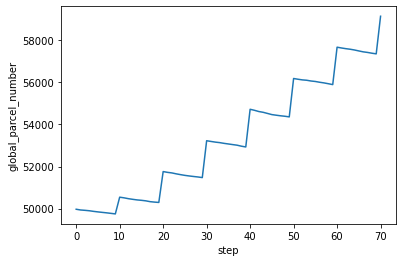

In [4]:
ds.global_parcel_number.plot()

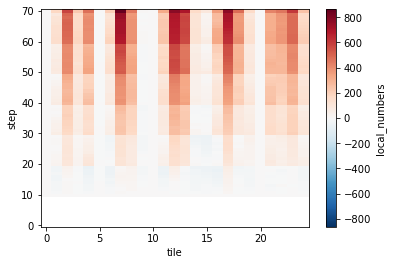

In [5]:
(ds.local_numbers - ds.local_numbers.sel(step=10)).plot()

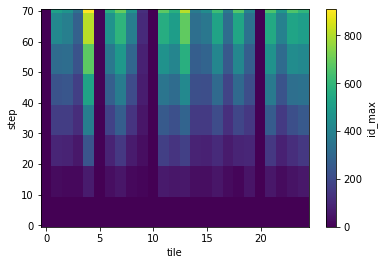

In [6]:
(ds.id_max - ds.id_max.sel(step=0)).plot()